In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#import beautiful soup
from urllib.request import urlopen
from bs4 import BeautifulSoup


print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [25]:
address = 'Jeddah , Saudi Arabia'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Riyadh are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


The geograpical coordinate of Riyadh are 21.5822247, 39.1640396.


In [26]:
CLIENT_ID = '1RVCAH2RXR1DS4GCT4ADDEN51NE0QRKNHY1RE2B0DA5WBCNI' # your Foursquare ID
CLIENT_SECRET = '4DKM0OYP0XOKU0PP3WDGONR2LOQQ524PVGVULJ0JY5IZ0ZNV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1RVCAH2RXR1DS4GCT4ADDEN51NE0QRKNHY1RE2B0DA5WBCNI
CLIENT_SECRET:4DKM0OYP0XOKU0PP3WDGONR2LOQQ524PVGVULJ0JY5IZ0ZNV


In [27]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=1RVCAH2RXR1DS4GCT4ADDEN51NE0QRKNHY1RE2B0DA5WBCNI&client_secret=4DKM0OYP0XOKU0PP3WDGONR2LOQQ524PVGVULJ0JY5IZ0ZNV&v=20180605&ll=21.5822247,39.1640396&radius=500&limit=100'

In [28]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e0271e0216785001b04246d'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'As Salamah',
  'headerFullLocation': 'As Salamah, Jeddah',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 68,
  'suggestedBounds': {'ne': {'lat': 21.586724704500007,
    'lng': 39.16886984804075},
   'sw': {'lat': 21.577724695499995, 'lng': 39.159209351959255}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4fd0fdabe4b0a91cca68bfc2',
       'name': 'Al Mahawi Sweets || حلويات المهاوي',
       'location': {'address': 'Sari St.',
        'lat': 21.580724489603817,
        'lng': 39.163461555471315,
        'labeledLatLngs': [{'label': 'display',
       

In [29]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']


In [30]:
#pull the actual data from the Foursquare API

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues

,venue.name,venue.id,venue.categories,venue.location.lat,venue.location.lng
0,Al Mahawi Sweets || حلويات المهاوي,4fd0fdabe4b0a91cca68bfc2,Dessert Shop,21.580724,39.163462
1,Al Merkaz (المركاز),5aa8e810c47cf9650f84513e,Hookah Bar,21.582892,39.161561
2,McDonald's (ماكدونالدز),4e5fea7a18a8ce02fbbdb814,Fast Food Restaurant,21.580938,39.163797
3,Hummus Refi (حمص ريفي),4bfdef184cf820a13246edf4,Middle Eastern Restaurant,21.580490,39.162727
4,Asia Restaurant (مطعم آسيا),4bed9b49e3562d7f6346fff8,Thai Restaurant,21.580301,39.161358
5,Talah Aljood (تالة الجود),4e36ab0a1838f85189b354f2,Dessert Shop,21.579704,39.161000
6,X2 Lounge (أكس 2),5d2b7145afbe2900239c8be2,Hookah Bar,21.581951,39.167247
7,Barnies (بارنيز),5104c6b3e4b048e6f6b578b7,Café,21.580188,39.161137
8,AL-ZAWAQA (الذواقة),4ea088548b810332abf3ff98,Middle Eastern Restaurant,21.581661,39.167761
9,Fitness Time Ladies,5c2305f2e97dfb002c612b59,Gym / Fitness Center,21.585359,39.161615


In [31]:
#fix the column names so they look relatively normal

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,id,categories,lat,lng
0,Al Mahawi Sweets || حلويات المهاوي,4fd0fdabe4b0a91cca68bfc2,Dessert Shop,21.580724,39.163462
1,Al Merkaz (المركاز),5aa8e810c47cf9650f84513e,Hookah Bar,21.582892,39.161561
2,McDonald's (ماكدونالدز),4e5fea7a18a8ce02fbbdb814,Fast Food Restaurant,21.580938,39.163797
3,Hummus Refi (حمص ريفي),4bfdef184cf820a13246edf4,Middle Eastern Restaurant,21.580490,39.162727
4,Asia Restaurant (مطعم آسيا),4bed9b49e3562d7f6346fff8,Thai Restaurant,21.580301,39.161358
5,Talah Aljood (تالة الجود),4e36ab0a1838f85189b354f2,Dessert Shop,21.579704,39.161000
6,X2 Lounge (أكس 2),5d2b7145afbe2900239c8be2,Hookah Bar,21.581951,39.167247
7,Barnies (بارنيز),5104c6b3e4b048e6f6b578b7,Café,21.580188,39.161137
8,AL-ZAWAQA (الذواقة),4ea088548b810332abf3ff98,Middle Eastern Restaurant,21.581661,39.167761
9,Fitness Time Ladies,5c2305f2e97dfb002c612b59,Gym / Fitness Center,21.585359,39.161615


In [32]:
# find a list of unique categories from the API so we can see what may or may not fit for restaurants

nearby_venues['categories'].unique()

array(['Dessert Shop', 'Hookah Bar', 'Fast Food Restaurant',
       'Middle Eastern Restaurant', 'Thai Restaurant', 'Café',
       'Gym / Fitness Center', 'Hotel', 'Sushi Restaurant',
       'Health & Beauty Service', 'Coffee Shop', 'Sandwich Place',
       'Ice Cream Shop', 'Chinese Restaurant', 'Breakfast Spot',
       'Convenience Store', 'Health Food Store', 'Supermarket',
       'Seafood Restaurant', 'Food Truck', 'BBQ Joint', 'Pizza Place',
       'Burger Joint', 'Pool', 'Grocery Store', 'Flower Shop', 'Bakery',
       'Rental Car Location', 'Hotel Bar', 'Asian Restaurant',
       'Intersection', 'Wedding Hall', 'Fried Chicken Joint'],
      dtype=object)

In [34]:
# I am sure there is a function that can be written to do this at scale but since it was a small list, I did it manually

removal_list = [  'Café',
       'Gym / Fitness Center', 'Hotel', 
       'Health & Beauty Service', 'Coffee Shop',
       'Ice Cream Shop', 
       'Convenience Store',  'Supermarket',
       
        'Grocery Store', 'Flower Shop', 'Bakery',
       'Rental Car Location', 'Hotel Bar', 
       'Intersection', 'Wedding Hall','Hookah Bar','Pool']

nearby_venues2 = nearby_venues.copy()

#getting a clear dataframe of just restaurants
nearby_venues2 = nearby_venues2[~nearby_venues2['categories'].isin(removal_list)]
nearby_venues2

,name,id,categories,lat,lng
0,Al Mahawi Sweets || حلويات المهاوي,4fd0fdabe4b0a91cca68bfc2,Dessert Shop,21.580724,39.163462
2,McDonald's (ماكدونالدز),4e5fea7a18a8ce02fbbdb814,Fast Food Restaurant,21.580938,39.163797
3,Hummus Refi (حمص ريفي),4bfdef184cf820a13246edf4,Middle Eastern Restaurant,21.580490,39.162727
4,Asia Restaurant (مطعم آسيا),4bed9b49e3562d7f6346fff8,Thai Restaurant,21.580301,39.161358
5,Talah Aljood (تالة الجود),4e36ab0a1838f85189b354f2,Dessert Shop,21.579704,39.161000
8,AL-ZAWAQA (الذواقة),4ea088548b810332abf3ff98,Middle Eastern Restaurant,21.581661,39.167761
11,El Malky (المالكي),5894a0b55289305ef7181d2c,Dessert Shop,21.580883,39.160253
14,ASHI SUSHI & Takoyaki,57f24a61498e8000de659d45,Sushi Restaurant,21.581888,39.159764
17,Al Bidar Restaurant (مطاعم البيدر),50cf00c9e4b0cbbce0cb2eed,Middle Eastern Restaurant,21.582178,39.166938
20,Subway (صب واي),5750422e498ed111af319adc,Sandwich Place,21.585298,39.161312


In [35]:
#let's get a list of venues

venue_id_list = nearby_venues2['id'].tolist()
venue_id_list

['4fd0fdabe4b0a91cca68bfc2',
 '4e5fea7a18a8ce02fbbdb814',
 '4bfdef184cf820a13246edf4',
 '4bed9b49e3562d7f6346fff8',
 '4e36ab0a1838f85189b354f2',
 '4ea088548b810332abf3ff98',
 '5894a0b55289305ef7181d2c',
 '57f24a61498e8000de659d45',
 '50cf00c9e4b0cbbce0cb2eed',
 '5750422e498ed111af319adc',
 '4ef4ca4a9a528bc5d8c632ce',
 '4f018a6ae5faf2869d4c7365',
 '520aee9511d2f4f58c2e052d',
 '4d20bb54d7b0b1f7bc32179f',
 '59970018419a9e32cd192f06',
 '51e2b27d498e7b1ebfae3260',
 '4ea175752c5b5cb4f38f1f82',
 '58d9eaf30acb6a4c4a992022',
 '4cfd6b52d8468cfaa2f5ff6b',
 '4f00d614be7bbcd4f4807a28',
 '51b8bed5498e00e0e1df176e',
 '5033be23e4b0ee26f2c2f339',
 '5117da32e4b0665ce9b44de2',
 '5432c09b498e66916685e285',
 '537510ec498e5c573fbd41ce',
 '58986097fc73d40beda172e7',
 '4e8f62dedab46521c0a59c9a',
 '4cae30503ecc6dcb614e8312',
 '52d6f635498ef26c3a3e9fc2',
 '4d14cc56816af04d31cb3ec2',
 '53f9bc02498e2a545154209a',
 '55c7bb12498e01d9edb902d9',
 '4bcde4c38920b713d97ea0dc',
 '53fc9a65498e72388cd9e483',
 '4e41b72e8877

In [36]:
#set up to pull the likes from the API based on venue ID

url_list = []
like_list = []
json_list = []

for i in venue_id_list:
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)
print(like_list)

[39, 271, 97, 249, 102, 185, 25, 39, 20, 21, 10, 15, 94, 117, 7, 28, 196, 16, 102, 90, 12, 18, 15, 19, 12, 11, 5, 18, 6, 21, 3, 11, 6, 4, 10]


In [37]:
#double check that we did not lose any venues based on if likes were available

print(len(like_list))
print(len(venue_id_list))

35
35


In [39]:
#let's make a copy of our initial dataframe just in case anything goes wrong

Jeddah_venues = nearby_venues2.copy()
Jeddah_venues.head()

,name,id,categories,lat,lng
0,Al Mahawi Sweets || حلويات المهاوي,4fd0fdabe4b0a91cca68bfc2,Dessert Shop,21.580724,39.163462
2,McDonald's (ماكدونالدز),4e5fea7a18a8ce02fbbdb814,Fast Food Restaurant,21.580938,39.163797
3,Hummus Refi (حمص ريفي),4bfdef184cf820a13246edf4,Middle Eastern Restaurant,21.580490,39.162727
4,Asia Restaurant (مطعم آسيا),4bed9b49e3562d7f6346fff8,Thai Restaurant,21.580301,39.161358
5,Talah Aljood (تالة الجود),4e36ab0a1838f85189b354f2,Dessert Shop,21.579704,39.161000


In [40]:
# add in the list of likes

Jeddah_venues['total likes'] = like_list
Jeddah_venues.head()

,name,id,categories,lat,lng,total likes
0,Al Mahawi Sweets || حلويات المهاوي,4fd0fdabe4b0a91cca68bfc2,Dessert Shop,21.580724,39.163462,39
2,McDonald's (ماكدونالدز),4e5fea7a18a8ce02fbbdb814,Fast Food Restaurant,21.580938,39.163797,271
3,Hummus Refi (حمص ريفي),4bfdef184cf820a13246edf4,Middle Eastern Restaurant,21.580490,39.162727,97
4,Asia Restaurant (مطعم آسيا),4bed9b49e3562d7f6346fff8,Thai Restaurant,21.580301,39.161358,249
5,Talah Aljood (تالة الجود),4e36ab0a1838f85189b354f2,Dessert Shop,21.579704,39.161000,102


In [41]:
# now let's bin total likes

print(Jeddah_venues['total likes'].max())
print(Jeddah_venues['total likes'].min())
print(Jeddah_venues['total likes'].median())
print(Jeddah_venues['total likes'].mean())

271
3
19.0
54.114285714285714


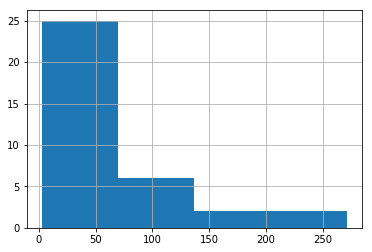

In [43]:
# let's visualize our total likes based on a histogram

import matplotlib.pyplot as plt
Jeddah_venues['total likes'].hist(bins=4)
plt.show()

In [45]:
# what are the bins we want to use?

print(np.percentile(Jeddah_venues['total likes'], 25))
print(np.percentile(Jeddah_venues['total likes'], 50))
print(np.percentile(Jeddah_venues['total likes'], 75))

11.0
19.0
92.0


In [64]:
# now we have our bin values so let's set them to the appropriate values
# less than 11, 12-19, 20-50, 51>
# poor, below avg, abv avg, great

poor = Jeddah_venues['total likes']<=11
below_avg = Jeddah_venues[(Jeddah_venues['total likes']>12) & (Jeddah_venues['total likes']<=19)]
abv_avg = Jeddah_venues[(Jeddah_venues['total likes']>20) & (Jeddah_venues['total likes']<=50)]
great = Jeddah_venues['total likes']>51

In [79]:
# let's set up a function that will re-categorize our restaurants based on likes

def conditions(s):
    if s['total likes']<=11:
        return 'poor'
    if s['total likes']<=19:
        return 'below avg'
    if s['total likes']>=20,<=50:
        return 'avg avg'
    if s['total likes']>50:
        return 'great'

Jeddah_venues['total likes_cat']=Jeddah_venues.apply(conditions, axis=1)

SyntaxError: invalid syntax (<ipython-input-79-6f607520c832>, line 8)

In [80]:
Jeddah_venues

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
0,Al Mahawi Sweets || حلويات المهاوي,4fd0fdabe4b0a91cca68bfc2,Dessert Shop,21.580724,39.163462,39,avg avg,other,3
2,McDonald's (ماكدونالدز),4e5fea7a18a8ce02fbbdb814,Fast Food Restaurant,21.580938,39.163797,271,great,fast food,2
3,Hummus Refi (حمص ريفي),4bfdef184cf820a13246edf4,Middle Eastern Restaurant,21.580490,39.162727,97,great,other,2
4,Asia Restaurant (مطعم آسيا),4bed9b49e3562d7f6346fff8,Thai Restaurant,21.580301,39.161358,249,great,euro asia indian food,2
5,Talah Aljood (تالة الجود),4e36ab0a1838f85189b354f2,Dessert Shop,21.579704,39.161000,102,great,other,2
8,AL-ZAWAQA (الذواقة),4ea088548b810332abf3ff98,Middle Eastern Restaurant,21.581661,39.167761,185,great,other,2
11,El Malky (المالكي),5894a0b55289305ef7181d2c,Dessert Shop,21.580883,39.160253,25,avg avg,other,3
14,ASHI SUSHI & Takoyaki,57f24a61498e8000de659d45,Sushi Restaurant,21.581888,39.159764,39,avg avg,euro asia indian food,3
17,Al Bidar Restaurant (مطاعم البيدر),50cf00c9e4b0cbbce0cb2eed,Middle Eastern Restaurant,21.582178,39.166938,20,avg avg,other,3
20,Subway (صب واي),5750422e498ed111af319adc,Sandwich Place,21.585298,39.161312,21,avg avg,other,3


In [81]:
# let's star the process for re-categorizing the categories

Jeddah_venues['categories'].unique()

array(['Dessert Shop', 'Fast Food Restaurant',
       'Middle Eastern Restaurant', 'Thai Restaurant', 'Sushi Restaurant',
       'Sandwich Place', 'Chinese Restaurant', 'Breakfast Spot',
       'Health Food Store', 'Seafood Restaurant', 'Food Truck',
       'BBQ Joint', 'Pizza Place', 'Burger Joint', 'Asian Restaurant',
       'Fried Chicken Joint'], dtype=object)

In [82]:
# let's create our new categories and create a function to apply those to our existing data


healthy = ['Health Food Store']
other = ['Dessert Shop','Middle Eastern Restaurant','Sandwich Place']
euro_asia_indian_food = ['Thai Restaurant', 'Sushi Restaurant', 'Chinese Restaurant','Asian Restaurant']
fast_food = ['Fast Food Restaurant','Breakfast Spot','Food Truck']
american_food = ['Burger Joint', 'BBQ Joint', 'Burger Joint']
italian_food = ['Pizza Place', 'Seafood Restaurant']

def conditions2(s):
    if s['categories'] in healthy:
        return 'healthy'
    if s['categories'] in other:
        return 'other'
    if s['categories'] in euro_asia_indian_food:
        return 'euro asia indian food'
    if s['categories'] in fast_food:
        return 'fast food'
    if s['categories'] in american_food:
        return 'american food'
    if s['categories'] in italian_food:
        return 'italian food'

Jeddah_venues['categories_new']=Jeddah_venues.apply(conditions2, axis=1)

In [83]:
Jeddah_venues

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
0,Al Mahawi Sweets || حلويات المهاوي,4fd0fdabe4b0a91cca68bfc2,Dessert Shop,21.580724,39.163462,39,avg avg,other,3
2,McDonald's (ماكدونالدز),4e5fea7a18a8ce02fbbdb814,Fast Food Restaurant,21.580938,39.163797,271,great,fast food,2
3,Hummus Refi (حمص ريفي),4bfdef184cf820a13246edf4,Middle Eastern Restaurant,21.580490,39.162727,97,great,other,2
4,Asia Restaurant (مطعم آسيا),4bed9b49e3562d7f6346fff8,Thai Restaurant,21.580301,39.161358,249,great,euro asia indian food,2
5,Talah Aljood (تالة الجود),4e36ab0a1838f85189b354f2,Dessert Shop,21.579704,39.161000,102,great,other,2
8,AL-ZAWAQA (الذواقة),4ea088548b810332abf3ff98,Middle Eastern Restaurant,21.581661,39.167761,185,great,other,2
11,El Malky (المالكي),5894a0b55289305ef7181d2c,Dessert Shop,21.580883,39.160253,25,avg avg,other,3
14,ASHI SUSHI & Takoyaki,57f24a61498e8000de659d45,Sushi Restaurant,21.581888,39.159764,39,avg avg,euro asia indian food,3
17,Al Bidar Restaurant (مطاعم البيدر),50cf00c9e4b0cbbce0cb2eed,Middle Eastern Restaurant,21.582178,39.166938,20,avg avg,other,3
20,Subway (صب واي),5750422e498ed111af319adc,Sandwich Place,21.585298,39.161312,21,avg avg,other,3


In [84]:
# one hot encoding
Jeddah_onehot = pd.get_dummies(Jeddah_venues[['categories_new', 'total likes_cat']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Jeddah_onehot['Name'] = Jeddah_venues['name'] 

# move neighborhood column to the first column
fixed_columns = [Jeddah_onehot.columns[-1]] + list(Jeddah_onehot.columns[:-1])
Jeddah_onehot = Jeddah_onehot[fixed_columns]

Jeddah_onehot.head()

,Name,american food,euro asia indian food,fast food,healthy,italian food,other,avg avg,below avg,great,poor
0,Al Mahawi Sweets || حلويات المهاوي,0,0,0,0,0,1,1,0,0,0
2,McDonald's (ماكدونالدز),0,0,1,0,0,0,0,0,1,0
3,Hummus Refi (حمص ريفي),0,0,0,0,0,1,0,0,1,0
4,Asia Restaurant (مطعم آسيا),0,1,0,0,0,0,0,0,1,0
5,Talah Aljood (تالة الجود),0,0,0,0,0,1,0,0,1,0


In [85]:
cluster_df = Jeddah_onehot.drop('Name', axis=1)

k_clusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(cluster_df)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 2, 2, 2, 2, 2, 3, 3, 3, 3], dtype=int32)

In [86]:
Jeddah_venues['label'] = kmeans.labels_
Jeddah_venues.head()

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
0,Al Mahawi Sweets || حلويات المهاوي,4fd0fdabe4b0a91cca68bfc2,Dessert Shop,21.580724,39.163462,39,avg avg,other,3
2,McDonald's (ماكدونالدز),4e5fea7a18a8ce02fbbdb814,Fast Food Restaurant,21.580938,39.163797,271,great,fast food,2
3,Hummus Refi (حمص ريفي),4bfdef184cf820a13246edf4,Middle Eastern Restaurant,21.580490,39.162727,97,great,other,2
4,Asia Restaurant (مطعم آسيا),4bed9b49e3562d7f6346fff8,Thai Restaurant,21.580301,39.161358,249,great,euro asia indian food,2
5,Talah Aljood (تالة الجود),4e36ab0a1838f85189b354f2,Dessert Shop,21.579704,39.161000,102,great,other,2


In [87]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i+x+(i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Jeddah_venues['lat'], Jeddah_venues['lng'], Jeddah_venues['name'], Jeddah_venues['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [88]:
map_clusters

In [89]:
Jeddah_venues.loc[Jeddah_venues['label']==0]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
22,East Asia Restaurant (مطعم شرق آسيا),4ef4ca4a9a528bc5d8c632ce,Chinese Restaurant,21.580639,39.161305,10,poor,euro asia indian food,0
28,Amha Food,59970018419a9e32cd192f06,Health Food Store,21.585291,39.161357,7,poor,healthy,0
42,Circles Burger (سيركلز برجر),58986097fc73d40beda172e7,Burger Joint,21.581862,39.159764,11,poor,american food,0
48,Pizza Hut,4e8f62dedab46521c0a59c9a,Pizza Place,21.581727,39.159928,5,poor,italian food,0
51,ركن الجمبري,52d6f635498ef26c3a3e9fc2,Seafood Restaurant,21.582753,39.159554,6,poor,italian food,0
53,Diet Center - Saqr Quraish,53f9bc02498e2a545154209a,Health Food Store,21.585484,39.162077,3,poor,healthy,0
54,Jan Burger (جان برجر),55c7bb12498e01d9edb902d9,Burger Joint,21.585315,39.161432,11,poor,american food,0
60,مطعم آسيا,4bcde4c38920b713d97ea0dc,Asian Restaurant,21.580444,39.161462,6,poor,euro asia indian food,0
62,Lahem Beajeen (مطعم لحم بعجين),53fc9a65498e72388cd9e483,Middle Eastern Restaurant,21.581261,39.159999,4,poor,other,0
66,بيت الشواية,4e41b72e887719193960ef3a,Fried Chicken Joint,21.581639,39.159839,10,poor,None,0


In [90]:
Jeddah_venues.loc[Jeddah_venues['label']==1]


,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
23,Rokon Al Zorbian (ركن الزربيان),4f018a6ae5faf2869d4c7365,Middle Eastern Restaurant,21.581506,39.159932,15,below avg,other,1
33,Melt Burger,58d9eaf30acb6a4c4a992022,Food Truck,21.586441,39.164794,16,below avg,fast food,1
36,حلويات النابلسي,51b8bed5498e00e0e1df176e,Dessert Shop,21.580639,39.160116,12,below avg,other,1
37,مشويات محمد منشو al mnshu BBQ,5033be23e4b0ee26f2c2f339,BBQ Joint,21.582637,39.159683,18,below avg,american food,1
38,Papa John's (بابا جونز),5117da32e4b0665ce9b44de2,Pizza Place,21.580888,39.160126,15,below avg,italian food,1
40,Shawarmer (شاورمر),5432c09b498e66916685e285,Middle Eastern Restaurant,21.585315,39.161336,19,below avg,other,1
41,Alnabulsi Sweets (حلويات النابلسي),537510ec498e5c573fbd41ce,Dessert Shop,21.580835,39.160060,12,below avg,other,1
50,Kunafah House (بيت الكنافة),4cae30503ecc6dcb614e8312,Dessert Shop,21.580189,39.161590,18,below avg,other,1


In [91]:
Jeddah_venues.loc[Jeddah_venues['label']==2]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
2,McDonald's (ماكدونالدز),4e5fea7a18a8ce02fbbdb814,Fast Food Restaurant,21.580938,39.163797,271,great,fast food,2
3,Hummus Refi (حمص ريفي),4bfdef184cf820a13246edf4,Middle Eastern Restaurant,21.580490,39.162727,97,great,other,2
4,Asia Restaurant (مطعم آسيا),4bed9b49e3562d7f6346fff8,Thai Restaurant,21.580301,39.161358,249,great,euro asia indian food,2
5,Talah Aljood (تالة الجود),4e36ab0a1838f85189b354f2,Dessert Shop,21.579704,39.161000,102,great,other,2
8,AL-ZAWAQA (الذواقة),4ea088548b810332abf3ff98,Middle Eastern Restaurant,21.581661,39.167761,185,great,other,2
24,Abo Zaid (ابوزيد),520aee9511d2f4f58c2e052d,Breakfast Spot,21.582303,39.159613,94,great,fast food,2
26,Radi Hilal (راضي هلال),4d20bb54d7b0b1f7bc32179f,Middle Eastern Restaurant,21.582641,39.159502,117,great,other,2
32,ElBiet ElHalbi (البيت الحلبي),4ea175752c5b5cb4f38f1f82,Middle Eastern Restaurant,21.581007,39.160128,196,great,other,2
34,Hardee's (هارديز),4cfd6b52d8468cfaa2f5ff6b,Fast Food Restaurant,21.580925,39.164004,102,great,fast food,2
35,Abdulwahed Halabi BBQ (مشويات عبدالوهاب الحلبي),4f00d614be7bbcd4f4807a28,BBQ Joint,21.581687,39.159874,90,great,american food,2


In [92]:
Jeddah_venues.loc[Jeddah_venues['label']==3]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
0,Al Mahawi Sweets || حلويات المهاوي,4fd0fdabe4b0a91cca68bfc2,Dessert Shop,21.580724,39.163462,39,avg avg,other,3
11,El Malky (المالكي),5894a0b55289305ef7181d2c,Dessert Shop,21.580883,39.160253,25,avg avg,other,3
14,ASHI SUSHI & Takoyaki,57f24a61498e8000de659d45,Sushi Restaurant,21.581888,39.159764,39,avg avg,euro asia indian food,3
17,Al Bidar Restaurant (مطاعم البيدر),50cf00c9e4b0cbbce0cb2eed,Middle Eastern Restaurant,21.582178,39.166938,20,avg avg,other,3
20,Subway (صب واي),5750422e498ed111af319adc,Sandwich Place,21.585298,39.161312,21,avg avg,other,3
31,Sayadiyah (مطعم الصيادية),51e2b27d498e7b1ebfae3260,Seafood Restaurant,21.584389,39.159995,28,avg avg,italian food,3
52,KFC | دجاج كنتاكي (دجاج كنتاكي),4d14cc56816af04d31cb3ec2,Fast Food Restaurant,21.580971,39.163867,21,avg avg,fast food,3
